In [1]:
#IMPORTING: Importing Modules
!pip install opendatasets
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Downloading Kaggle dataset and storing it to a directory.
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}
od.download(
    "https://www.kaggle.com/datasets/cid007/pizza-restaurants-us", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 395k/395k [00:00<00:00, 47.1MB/s]

In [3]:
#Accessing the CSV file.
pizza_directory = ('./pizza-restaurants-us/Pizza_Restaurants_and_the_Pizza_They_Sell.csv')

In [4]:
#Reading the CSV File and storing in a dataframe.
pizza = pd.read_csv(pizza_directory)

In [5]:
pizza.shape

(10000, 19)

In [6]:
pizza.head()

,id,address,categories,primaryCategories,city,country,keys,latitude,longitude,menuPageURL,menus.amountMax,menus.amountMin,menus.description,menus.name,name,postalCode,priceRangeMin,priceRangeMax,province
0,AVz3Y-7h3D1zeR_xDAqm,4203 E Kiehl Ave,"Pizza,Restaurant,American restaurants,Pizza Pl...",Accommodation & Food Services,Sherwood,US,us/ar/sherwood/4203ekiehlave/-1051391616,34.832300,-92.183800,http://www.citysearch.com/profile/menu/1550074...,7.98,7.98,NaN,Cheese Pizza,Shotgun Dans Pizza,72120,0,25,AR
1,AVweGPFF_7pvs4fzAAzQ,25 E Camelback Rd,"Pizza,Pizza Place,Restaurants",Accommodation & Food Services,Phoenix,US,us/az/phoenix/25ecamelbackrd/-727422936,33.509266,-112.073044,NaN,6.00,6.00,NaN,Pizza Cookie,Sauce Pizza Wine,85012,0,25,AZ
2,AVwdRGa9_7pvs4fz4E3K,3703 Paxton Ave,"Restaurant,Pizza Place,Restaurants",Accommodation & Food Services,Cincinnati,US,us/oh/cincinnati/3703paxtonave/-619797122,39.144883,-84.432685,http://www.citysearch.com/profile/menu/8160503...,6.49,6.49,a saucelessampcomma double cheese pizza with a...,Pizza Blanca,Mios Pizzeria,45209,0,25,OH
3,AVwdX4psIN2L1WUfvJB1,30495 John R Rd,"Pizza,Carry-out food,Pizza Place,Restaurants",Accommodation & Food Services,Madison Heights,US,us/mi/madisonheights/30495johnrrd/-874863116,42.516669,-83.106630,NaN,5.99,5.99,NaN,Small Pizza,Hungry Howies Pizza,48071,25,40,MI
4,AVwdaeTtkufWRAb55pSH,3600 Eastern Ave,"Pizza,American restaurants,Pizza Place,Pizza e...",Accommodation & Food Services,Baltimore,US,us/md/baltimore/3600easternave/-1270965359,39.286630,-76.566984,NaN,5.49,5.49,NaN,Pizza Sub,Spartan Pizzeria,21224,0,25,MD


In [7]:
#Makeing all string objects lower case.
for col in pizza:
  if pizza[col].dtype == 'object':
    pizza[col] = pizza[col].str.lower()

In [8]:
pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 10000 non-null  object 
 1   address            10000 non-null  object 
 2   categories         10000 non-null  object 
 3   primaryCategories  10000 non-null  object 
 4   city               10000 non-null  object 
 5   country            10000 non-null  object 
 6   keys               10000 non-null  object 
 7   latitude           10000 non-null  float64
 8   longitude          10000 non-null  float64
 9   menuPageURL        1679 non-null   object 
 10  menus.amountMax    10000 non-null  float64
 11  menus.amountMin    10000 non-null  float64
 12  menus.description  3718 non-null   object 
 13  menus.name         10000 non-null  object 
 14  name               10000 non-null  object 
 15  postalCode         9996 non-null   object 
 16  priceRangeMin      1000

In [9]:
#Saving first five digits of postalCode and Converting postalCode to integer and dropping null values.
pizza = pizza.dropna(subset=['postalCode'])
pizza['postalCode'] = pizza['postalCode'].str[:5]
pizza['postalCode'] = pd.to_numeric(pizza['postalCode'], errors='coerce')
pizza['postalCode'] = pizza['postalCode'].astype(int)


<ipython-input-9-951d57cf14e7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza['postalCode'] = pizza['postalCode'].str[:5]
<ipython-input-9-951d57cf14e7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pizza['postalCode'] = pd.to_numeric(pizza['postalCode'], errors='coerce')
<ipython-input-9-951d57cf14e7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:/

In [10]:
#Going to filter out any menu items from the data fram that are over $50 as that is where the majority of the data exists with few exceptions.
pizza = pizza[pizza['menus.amountMin'] <= 50.00]
pizza = pizza[pizza['menus.amountMax'] <= 50.00]

In [11]:
#Delete Columns with many missing data entries and unused columns
pizza_cleansed = pizza.drop(columns=['menuPageURL', 'menus.description', 'id', 'categories', 'primaryCategories', 'keys', 'address', 'country', 'menus.amountMin', 'priceRangeMin', 'priceRangeMax'])

In [12]:
#Rename columns for correct syntax.
pizza_cleansed.rename(columns={'menus.name':'menu_item', 'menus.amountMax':'menus_amountMax', 'menus.amountMin':'menus_amountMin', 'province':'state'}, inplace=True)

In [13]:
#Removing special characters from 'menu_item'.
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('.').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('!').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('(').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split(')').str.get(0)
pizza_cleansed['menu_item'] = pizza_cleansed['menu_item'].str.split('"').str.get(0)

In [14]:
#Remove apostraphe from restuarant name.
pizza_cleansed['name'] = pizza_cleansed['name'].str.replace("'", "")

In [15]:
pizza_cleansed.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state
0,sherwood,34.832300,-92.183800,7.98,cheese pizza,shotgun dans pizza,72120,ar
1,phoenix,33.509266,-112.073044,6.00,pizza cookie,sauce pizza wine,85012,az
2,cincinnati,39.144883,-84.432685,6.49,pizza blanca,mios pizzeria,45209,oh
3,madison heights,42.516669,-83.106630,5.99,small pizza,hungry howies pizza,48071,mi
4,baltimore,39.286630,-76.566984,5.49,pizza sub,spartan pizzeria,21224,md


In [16]:
# Recommended Test Set - Greeley, CO
new_rows = {
    'city': ['greeley'],
    'latitude': [40.40],
    'longitude': [-104.80],
    'menus_amountMax': [0.00],
    'menu_item': ['large margherita pizza'],
    'name': ['mikes pizzeria'],
    'postalCode': [80634],
    'state': ['co'],
}
greeley_test = pd.DataFrame(new_rows)


In [17]:
greeley_test.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state
0,greeley,40.4,-104.8,0.0,large margherita pizza,mikes pizzeria,80634,co


In [18]:
pizza_cleansed.shape

(9953, 8)

In [19]:
#Import City, County and State Table
import requests
import zipfile
import io
import pandas as pd

url = "https://simplemaps.com/static/data/us-cities/1.77/basic/simplemaps_uscities_basicv1.77.zip"

response = requests.get(url)

with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    with z.open('uscities.csv') as f:
        data = f.read()
        cities = pd.read_csv(io.StringIO(data.decode('utf-8')))

In [20]:
#Makeing all string objects lower case.
for col in cities:
  if cities[col].dtype == 'object':
    cities[col] = cities[col].str.lower()

In [21]:
#Delete Unused Columns
cities_cleansed = cities.drop(columns=['city_ascii', 'state_name', 'county_fips', 'lat', 'lng', 'source', 'military', 'incorporated', 'timezone', 'ranking', 'zips', 'id'])

In [22]:
#Rename columns for correct syntax.
cities_cleansed.rename(columns={'state_id':'state', 'county_name':'county'}, inplace=True)

In [23]:
cities_cleansed.head()

,city,state,county,population,density
0,new york,ny,queens,18908608,11226.2
1,los angeles,ca,los angeles,11922389,3202.3
2,chicago,il,cook,8497759,4648.7
3,miami,fl,miami-dade,6080145,4728.2
4,houston,tx,harris,5970127,1382.2


In [24]:
#Downloading Kaggle Cost of Living dataset and storing it to a directory.
#IMPORTING DATA: Kaggle username and key.
 #{"username":"joshuahiatt","key":"0e0d379008f0bf32b03c49a253c03b4a"}
od.download(
    "https://www.kaggle.com/datasets/asaniczka/us-cost-of-living-dataset-3171-counties", force=True
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: joshuahiatt
Your Kaggle Key: ··········


100%|██████████| 1.22M/1.22M [00:00<00:00, 124MB/s]

In [25]:
#Accessing the City CSV file.
county_directory = ('./us-cost-of-living-dataset-3171-counties/cost_of_living_us.csv')

In [26]:
#Reading the CSV File and storing in a dataframe.
counties = pd.read_csv(county_directory)

In [27]:
#Makeing all string objects lower case.
for col in counties:
  if counties[col].dtype == 'object':
    counties[col] = counties[col].str.lower()

In [28]:
#Delete Unused Columns
counties_cleansed = counties.drop(columns=['case_id', 'isMetro', 'areaname'])

In [29]:
#Drop word county from county names.
counties_cleansed['county'] = counties_cleansed['county'].str.replace(" county", "")

In [30]:
counties_cleansed.head()

,state,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,al,autauga,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.414062
1,al,autauga,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.414062
2,al,autauga,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.414062
3,al,autauga,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.414062
4,al,autauga,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.414062


In [31]:
#Merge City and County Cost of Living Data
cc_merged_df = cities_cleansed.merge(counties_cleansed, on=['state', 'county'])

In [32]:
#Filterning to the average American Family Size of 2p3c.
filtered_df = cc_merged_df[cc_merged_df['family_member_count'] == '2p3c']

In [33]:
filtered_df.head()

,city,state,county,population,density,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
8,new york,ny,queens,18908608,11226.2,2p3c,33215.4,13324.5540,9098.80008,18667.0992,16863.2604,43934.2584,30940.6260,166044.000,79063.554688
18,queens,ny,queens,2405464,8503.7,2p3c,33215.4,13324.5540,9098.80008,18667.0992,16863.2604,43934.2584,30940.6260,166044.000,79063.554688
28,los angeles,ca,los angeles,11922389,3202.3,2p3c,32820.0,12665.6472,15013.33800,13611.9732,16481.2440,17577.1212,17726.3976,125895.732,78729.835938
38,long beach,ca,los angeles,466565,3555.1,2p3c,32820.0,12665.6472,15013.33800,13611.9732,16481.2440,17577.1212,17726.3976,125895.732,78729.835938
48,santa clarita,ca,los angeles,268273,1239.7,2p3c,32820.0,12665.6472,15013.33800,13611.9732,16481.2440,17577.1212,17726.3976,125895.732,78729.835938


In [34]:
#Merge greeley_test dataframe to filtered_df left join
greeley = greeley_test.merge(filtered_df, on=['city','state'], how='left')

In [35]:
greeley.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state,county,population,...,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,greeley,40.4,-104.8,0.0,large margherita pizza,mikes pizzeria,80634,co,weld,140984,...,2p3c,20328.0,12446.0112,16087.9512,15622.5648,11875.31616,20615.6472,14320.0308,111295.524,86818.140625


In [36]:
filtered_df.shape

(29443, 15)

In [37]:
pizza_demo_merged = pizza_cleansed.merge(filtered_df, on=['city', 'state'])

In [38]:
pizza_demo_merged.shape

(9002, 21)

In [39]:
df = pizza_demo_merged

In [40]:
df.head()

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state,county,population,...,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,sherwood,34.832300,-92.183800,7.98,cheese pizza,shotgun dans pizza,72120,ar,pulaski,32544,...,2p3c,13930.1376,11347.83396,14147.0508,16806.4272,9159.20580,16560.4980,9542.6250,91493.7768,69916.585938
1,sherwood,34.830867,-92.231603,9.39,u,us pizza co,72120,ar,pulaski,32544,...,2p3c,13930.1376,11347.83396,14147.0508,16806.4272,9159.20580,16560.4980,9542.6250,91493.7768,69916.585938
2,phoenix,33.509266,-112.073044,6.00,pizza cookie,sauce pizza wine,85012,az,maricopa,4064275,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250
3,phoenix,33.654650,-112.132750,5.50,meatball pizza roll,rays pizza,85027,az,maricopa,4064275,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250
4,phoenix,33.654650,-112.132750,5.50,green pepper and onion pizza roll,rays pizza,85027,az,maricopa,4064275,...,2p3c,21255.4164,11530.86396,14735.3304,16544.0856,11879.76192,20950.4124,12379.1016,109274.9760,78828.406250


In [41]:
#Appending Test Set to Regular Dataframe
df = df.append(greeley, ignore_index=True)

<ipython-input-41-6539869841fa>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(greeley, ignore_index=True)


In [42]:
df.iloc[-1:].head(1)

,city,latitude,longitude,menus_amountMax,menu_item,name,postalCode,state,county,population,...,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
9002,greeley,40.4,-104.8,0.0,large margherita pizza,mikes pizzeria,80634,co,weld,140984,...,2p3c,20328.0,12446.0112,16087.9512,15622.5648,11875.31616,20615.6472,14320.0308,111295.524,86818.140625


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


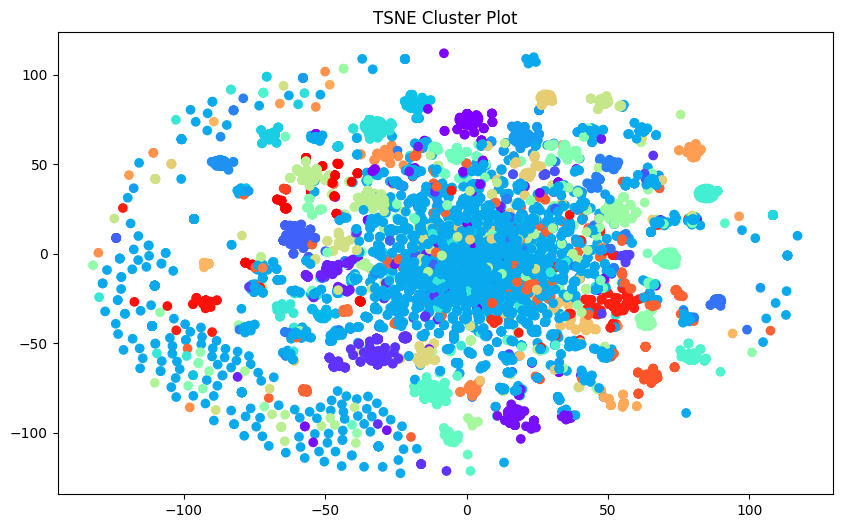

In [43]:
#Unsupervised categorization of the 'menu_item' column into 50 categories.
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Vectorize the text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['menu_item'])

# Cluster with K-Means
num_clusters = 48
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(X)

# Add cluster labels
df['category'] = kmeans.labels_

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Reduce to 2 dims with TSNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(X.toarray())

# Plot TSNE result
plt.figure(figsize=(10,6))
plt.scatter(tsne_result[:,0], tsne_result[:,1],
            c=kmeans.labels_, cmap='rainbow')
plt.title("TSNE Cluster Plot")
plt.show()

In [44]:
#One hot encoding categorical variables
cat_cols = ['city', 'name', 'state', 'county', 'category']
df = df.copy()
df = pd.get_dummies(df, columns=cat_cols)

In [45]:
# Retain index when splitting
words = df['menu_item'].str.split(expand=True).stack().reset_index(drop=True).unique()

# Create dummies on transformed series
word_dummies = pd.get_dummies(df['menu_item'].str.split(expand=True).stack().reset_index(drop=True))

# Join dummies to original dataframe
df = df.drop('menu_item', axis=1).join(word_dummies)

In [46]:
df.shape

(9003, 4951)

In [47]:
#Applying a StandardScaler to my numerical columns
from sklearn.preprocessing import StandardScaler

num_cols = ['latitude','longitude','population', 'density',
            'housing_cost', 'food_cost', 'transportation_cost',
            'healthcare_cost', 'other_necessities_cost', 'childcare_cost',
            'taxes', 'total_cost', 'median_family_income']

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])

In [51]:
# Find all column names that contain the substring 'greeley'
columns_with_greeley = [column for column in df.columns if 'greeley' in column]

# Print the list of column names
print("Columns containing 'greeley':", columns_with_greeley)


Columns containing 'greeley': ['city_greeley']


In [ ]:
# Get row 9002
from sklearn.utils import resample
row_9002 = df.iloc[9002]

# Bootstrap dataframe
df = resample(df, replace=True, n_samples=len(df), random_state=42)

# Check if row 9002 is in bootstrapped df
if 9002 not in df.index:
    # If not, add it
    df = df.append(row_9002)

In [58]:
# Bootstrap dataframe
#from sklearn.utils import resample
#df = resample(df, replace=True, n_samples=len(df), random_state=42)

In [52]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Separate the specified rows
specified_test_set = df[df['city_greeley'] == 1]

# Remove these rows from the original DataFrame
remaining_df = df.drop(specified_test_set.index)

# Prepare the features and target variable for the remaining data
X_remaining = remaining_df.drop(columns=['menus_amountMax', 'family_member_count'])
y_remaining = remaining_df['menus_amountMax']

# Perform train-test split on the remaining data
X_train, X_temp_test, y_train, y_temp_test = train_test_split(X_remaining, y_remaining, test_size=0.2)

# Add the specified rows to the test sets
X_test = pd.concat([X_temp_test, specified_test_set.drop(columns=['menus_amountMax', 'family_member_count'])])
y_test = pd.concat([y_temp_test, specified_test_set['menus_amountMax']])


In [51]:
# Train/test split - DONT USE THIS CODE WHEN PREDICTING FOR SPECIFIC CITY
from sklearn.model_selection import train_test_split
X = df.drop(columns=['menus_amountMax','family_member_count'])
y = df['menus_amountMax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
#XGBoost Mdoel
import xgboost as xgb
from sklearn.metrics import r2_score, mean_absolute_error

# XGBoost model
modelx = xgb.XGBRegressor(n_estimators=400)

modelx.fit(X_train, y_train)

# Training scores
y_pred_train = modelx.predict(X_train)
r2_train = modelx.score(X_train, y_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Test scores
y_pred_test = modelx.predict(X_test)
r2_test = modelx.score(X_test, y_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R^2 Train:', r2_train)
print('R^2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R^2 Train: 0.8057866721389422
R^2 Test: 0.5952129345720305
MAE Train: 2.1180618705226055
MAE Test: 2.967548529861504


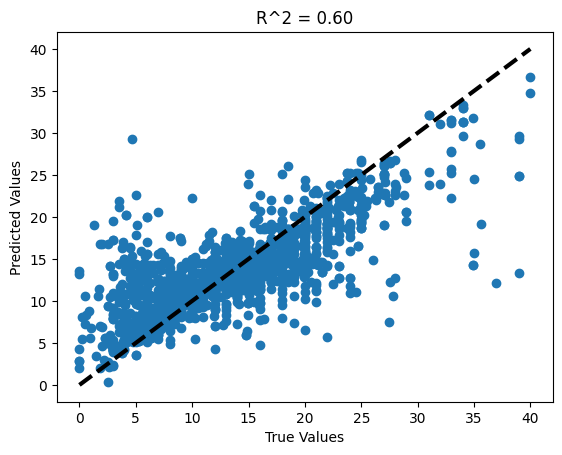

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test data
y_pred = modelx.predict(X_test)

# Calculate Pearson correlation
pearson_corr = r2_score(y_test, y_pred)

# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 = {pearson_corr:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [ ]:
#RandomForestGressor Model
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

model = RandomForestRegressor(n_estimators=400)

model.fit(X_train, y_train)

# Training scores
r2_train = model.score(X_train, y_train)
y_pred_train = model.predict(X_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Test scores
r2_test = model.score(X_test, y_test)
y_pred_test = model.predict(X_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R^2 Train:', r2_train)
print('R^2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

R^2 Train: 0.9291151853689149
R^2 Test: 0.6513551188841853
MAE Train: 0.9584408709136052
MAE Test: 2.3474528145016365


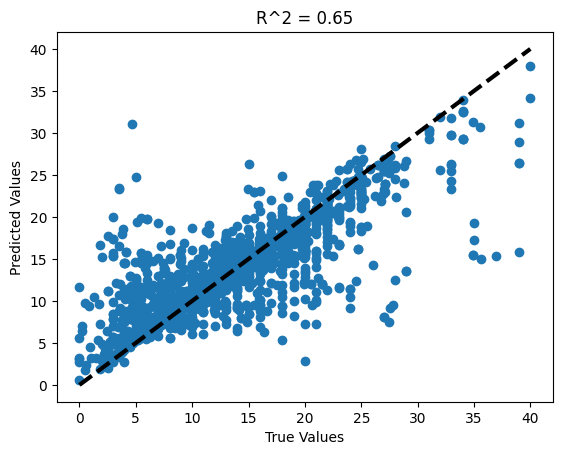

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test data
y_pred = model.predict(X_test)

# Calculate Pearson correlation
pearson_corr = r2_score(y_test, y_pred)

# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 = {pearson_corr:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [53]:
# AdaBoost model
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Base estimator
estimator = DecisionTreeRegressor()

# AdaBoost model
adb_model = AdaBoostRegressor(base_estimator=estimator,
                              n_estimators=400,
                              learning_rate=0.1)

adb_model.fit(X_train, y_train)

# Training scores
y_pred_train = adb_model.predict(X_train)
r2_train = adb_model.score(X_train, y_train)
mae_train = mean_absolute_error(y_train, y_pred_train)

# Test scores
y_pred_test = adb_model.predict(X_test)
r2_test = adb_model.score(X_test, y_test)
mae_test = mean_absolute_error(y_test, y_pred_test)

print('R^2 Train:', r2_train)
print('R^2 Test:', r2_test)
print('MAE Train:', mae_train)
print('MAE Test:', mae_test)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


R^2 Train: 0.9646592316358283
R^2 Test: 0.6912474295985525
MAE Train: 0.3699554070564502
MAE Test: 1.8073123458870566


In [59]:
# Filter for rows where city_greeley == 1
filter_rows = (X_test['city_greeley'] == 1)

# Filter X_test and y_true
X_test_filtered = X_test[filter_rows]
y_true_filtered = y_test[filter_rows]

# Filter y_pred
y_pred_filtered = y_pred_test[filter_rows]

# Create DataFrame from filtered X_test
df_greeley = pd.DataFrame(X_test_filtered)

# Add true y column
df_greeley['y_true'] = y_true_filtered

# Add predicted y column
df_greeley['y_pred'] = y_pred_filtered

# Print DataFrame
print(y_pred_filtered)


[12.75]


In [55]:
# Create mask for values equal to 1
mask = df_greeley == 1

# Print rows where mask is True
for index, row in df_greeley[mask].iterrows():
    print(row[row == 1])

city_greeley           1.0
name_mikes pizzeria    1.0
state_co               1.0
county_weld            1.0
category_16            1.0
pizza                  1.0
Name: 9002, dtype: float64


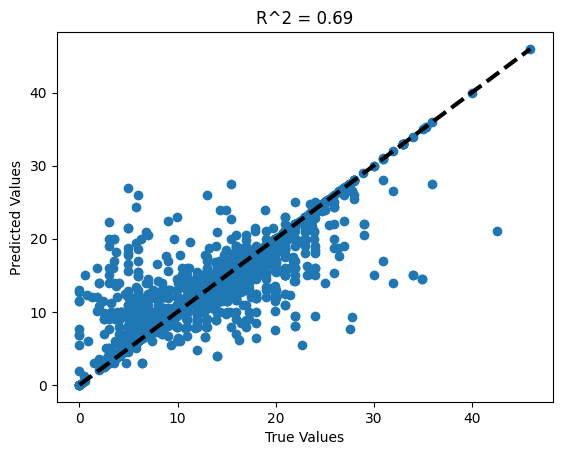

In [56]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Predict on test data
y_pred = adb_model.predict(X_test)

# Calculate Pearson correlation
pearson_corr = r2_score(y_test, y_pred)

# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 = {pearson_corr:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

In [57]:
# Get feature importances
importances = adb_model.feature_importances_

# Convert to dataframe
feature_df = pd.DataFrame(
    {'feature': X_train.columns,
     'importance': importances})

# Print top 10
print(feature_df.sort_values('importance', ascending = False).head(50))

                                feature  importance
8                       healthcare_cost    0.206397
1                             longitude    0.055554
0                              latitude    0.046883
2                            postalCode    0.042481
4                               density    0.031548
3                            population    0.023627
2975                         category_8    0.020147
9                other_necessities_cost    0.016088
4344                              pizza    0.015896
2978                        category_11    0.012113
6                             food_cost    0.011944
357                      city_henderson    0.011691
3008                        category_41    0.011432
7                   transportation_cost    0.010749
5                          housing_cost    0.010709
12                           total_cost    0.010520
13                 median_family_income    0.008709
10                       childcare_cost    0.008614
1010  name_a

In [ ]:
#Automated Feature Engineering with Bootstrapping
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.utils import resample

# Bootstrap dataframe
df2 = resample(pizza_demo_merged, replace=True, n_samples=len(pizza_demo_merged), random_state=42)

# Define features and preprocessing
cat_features = ['city', 'menu_item', 'name', 'state', 'county','category']
num_features = ['latitude', 'longitude', 'population', 'density' ,
                    'housing_cost', 'food_cost', 'transportation_cost',
                    'healthcare_cost', 'other_necessities_cost',
                    'childcare_cost', 'taxes', 'total_cost',
                    'median_family_income']



preprocess = ColumnTransformer(
    [
        # Tuple for categorical columns
        ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_features),

        # Tuple for numerical columns
        ('median', StandardScaler(), num_features)
    ]
)


# Modeling pipeline
pipeline = Pipeline([('preprocess', preprocess),
                     ('model', RandomForestRegressor(n_estimators=400))
])

# Train/test split
X = df2.drop(columns='menus_amountMax')
y = df2['menus_amountMax']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Fit pipeline
pipeline.fit(X_train, y_train)

# Evaluation metrics
def evaluate_model(X, y):
    preds = pipeline.predict(X)
    r2 = pipeline.score(X, y)
    mae = mean_absolute_error(y, preds)
    return r2, mae

r2_train, mae_train = evaluate_model(X_train, y_train)
r2_test, mae_test = evaluate_model(X_test, y_test)

print("Training R2: %0.3f" % r2_train)
print("Test R2: %0.3f" % r2_test)
print("Training MAE: %0.4f" % mae_train)
print("Test MAE: %0.4f" % mae_test)

Training R2: 0.949
Test R2: 0.719
Training MAE: 0.8346
Test MAE: 2.0741


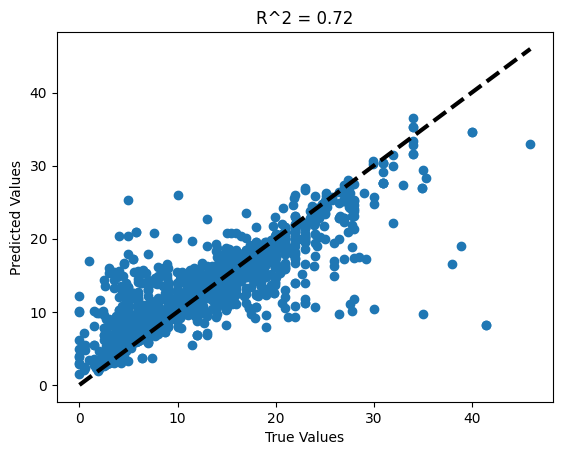

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Get predictions
y_true = y_test
y_pred = pipeline.predict(X_test)

# Calculate Pearson correlation
pearson_corr = r2_score(y_test, y_pred)

# Create scatter plot
plt.scatter(y_test, y_pred)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title(f'R^2 = {pearson_corr:.2f}')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=3)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

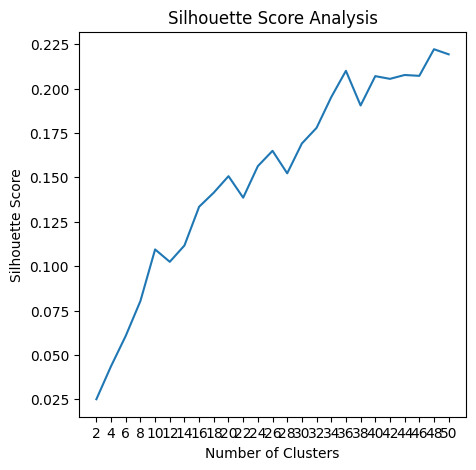

Best Number of Clusters: 48


In [ ]:
#Finding optimum number of clusters using teh silhouette method.
from sklearn.metrics import silhouette_score

# Existing text clustering steps
X = vectorizer.fit_transform(df['menu_item'])

num_clusters = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50]
silhouette_scores = []

for k in num_clusters:
    model = KMeans(n_clusters=k)

    labels = model.fit_predict(X)

    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot silhouette scores
plt.figure(figsize=(5,5))
sns.lineplot(x=num_clusters, y=silhouette_scores)
plt.xticks(num_clusters)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis')

# Select best k
best_k = num_clusters[np.argmax(silhouette_scores)]
plt.show()

print('Best Number of Clusters:', best_k)